# Stack Overflow Survey Project


## Analysis of gender differences in the developer community world-wide

As a young female developer I am astounded at the number of female developers in my company. I want to investigate gender -related questions regarding the dev community across the world using the yearsly Stack Overflow survey. 

### Questions to be answered by the below analysis:
1. Which country has the most gender balance in the developer community?
2. Does the job satisfaction differ amongst genders?
3. What are the features most correlated with predicting the respondent's gender?

### Data exploration


##### The data used for this analysis was the Stack Overflow Annual Developer Survey 2019. Their website states: "With nearly 90,000 responses fielded from over 170 countries and dependent territories, our 2019 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software." (c) https://insights.stackoverflow.com/survey


In [1]:
# This cell contains all the imports neccessary for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from matplotlib import pyplot
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###### Loading the survey results

In [2]:
df_info = pd.read_csv('survey_results_schema.csv')

In [3]:
df = pd.read_csv('survey_results_public.csv')

###### Exploring the datasets

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


In [7]:
df_info.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


The survey seems very extensive in its scope and contains replies to a large number of respondents (19,102). I want to understand the data quality for the columns that are applicable to my analysis.

###### Data Preprocessing

In [8]:
print('The number of values that are currently missing in the demographic dataset is {}'.format(df.isnull().sum().sum()))

The number of values that are currently missing in the demographic dataset is 1314054


In [9]:
na_val = df.isnull().sum().sort_values(ascending= False)
print(na_val)

ExCoderWillNotCode           18770
ExCoderNotForMe              18770
ExCoderActive                18767
ExCoderReturn                18767
ExCoderBalance               18767
ExCoderBelonged              18767
ExCoderSkills                18766
ExCoder10Years               18766
YearsCodedJobPast            18753
MobileDeveloperType          18546
ExpectedSalary               18284
TimeAfterBootcamp            18220
NonDeveloperType             17414
WebDeveloperType             14816
Salary                       14093
Overpaid                     13918
CousinEducation              12196
HaveWorkedFramework          11808
HoursPerWeek                 11381
Currency                     11070
InfluenceConsultants         10873
InfluenceServers             10863
InfluenceDeptTech            10859
InfluenceCloud               10859
InfluenceVizTools            10858
InfluenceRecruitment         10858
InfluenceCommunication       10852
InfluenceTechStack           10849
InfluenceDatabase   

In [10]:
na_val_p = na_val/df.shape[0]*100

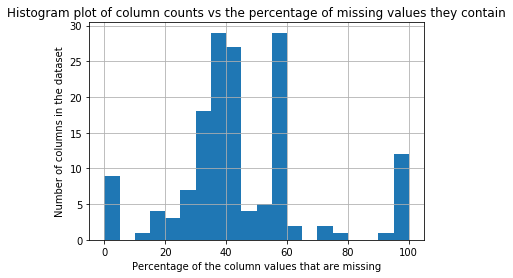

In [11]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(na_val_p, bins=20, range = (0, 100))

plt.xlabel('Percentage of the column values that are missing')
plt.ylabel('Number of columns in the dataset')
plt.title('Histogram plot of column counts vs the percentage of missing values they contain')
plt.grid(True)
plt.show()

It can be seen from above plot that most columns have a lot of the data missing, which aligns to my expectation of the dataset. However, I will decide on what to do with the missing values as I consider columns for each question of the analysis.

It can also be seen that the following columns have no missing values:
- FormalEducation                  
- EmploymentStatus                 
- University                       
- Country                          
- ProgramHobby                     
- Professional           
- Respondent (I assume this was populated automatically when the questionnaire was filled)

There is a bigger picture assumption that I make here and that is that the survey results are representative of the world population. Even though that might not be 100% true in practice, it works to simplify the real-life scenario into one that can be successfully analysed. 

### Question 1: Which country has the most gender balance in the developer community?

In [12]:
print('1. The country column has {}% missing values'.format(df['Country'].isnull().sum()/df.shape[0]*100))

1. The country column has 0.0% missing values


In [14]:
print('2. The gender column has {}% missing values'.format(df['Gender'].isnull().sum()/df.shape[0]*100))

2. The gender column has 32.415453879174954% missing values


In [13]:
#Seeing as I am basing my analysis on the gender variable, I will dropping the rows that have the gender feature missing for all the analysis:
df_gender = df[pd.notnull(df['Gender'])]

In [14]:
#Checking that the right number of rows remain (19102 - 6192)
df_gender.shape[0]

12910

In [15]:
df_gender.Gender.unique()

array(['Male', 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other'], dtype=object)

Seeing as there is a big variety of unique values in the Gender column, I am going to combine the values into 3 columns:
    Male
    Female
    Other

The following values will be recoded into 'Male':
    1. Male
    2. Male; Gender non-conforming
    3. Male; Other
    4. Male; Transgender

The following values will be recoded into 'Female':
    1. Female
    2. Female; Transgender
    3. Female; Gender non-conforming
    4. Female; Transgender; Gender non-conforming
    5. Female; Other

The following values will be recoded into 'Other':
    1. Gender non-conforming
    2. Other
    3. Male; Female
    4. Transgender
    5. Transgender; Gender non-conforming
    6. Male; Female; Transgender; Gender non-conforming; Other
    7. Male; Female; Transgender
    8. Male; Female; Other
    9. Male; Female; Transgender; Gender non-conforming
    10. Gender non-conforming; Other
    11. Male; Female; Gender non-conforming

In [16]:
#Creating a dictionary for the above groupings:

gender_dict = {'Male':'Male', 'Male; Gender non-conforming':'Male','Male; Other':'Male', 'Male; Transgender': 'Male',
               'Female':'Female','Female; Transgender':'Female','Female; Gender non-conforming':'Female','Female; Transgender; Gender non-conforming':'Female','Female; Other':'Female',
               'Other':'Other', 'Gender non-conforming':'Other','Male; Female':'Other','Transgender':'Other','Transgender; Gender non-conforming':'Other','Male; Female; Transgender; Gender non-conforming; Other':'Other','Male; Female; Transgender':'Other','Male; Female; Other':'Other','Male; Female; Transgender; Gender non-conforming':'Other','Gender non-conforming; Other':'Other','Male; Female; Gender non-conforming':'Other',}

In [17]:
df_gender['Gender_New'] = df_gender['Gender']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_gender['Gender_New'].replace(gender_dict,inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
#Checking that the mapping has worked, now should only have 3 unique values as per above
df_gender.Gender_New.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [20]:
df_gender.groupby(['Country'])['Respondent'].count()

Country
Afghanistan                4
Aland Islands              2
Albania                   13
Algeria                    5
Andorra                    3
Antarctica                 1
Argentina                 57
Armenia                   19
Australia                289
Austria                  143
Azerbaidjan                6
Bangladesh                38
Belarus                   16
Belgium                  106
Bermuda                    1
Bolivia                    3
Bosnia-Herzegovina        23
Botswana                   3
Brazil                   162
Bulgaria                  76
Cambodia                   1
Cameroon                   1
Canada                   627
Cape Verde                 1
Cayman Islands             1
Chile                     26
China                     65
Colombia                  36
Costa Rica                10
Croatia                   58
                        ... 
Serbia                    72
Singapore                 37
Slovak Republic           41
Sloven

It can be seen that there are a lot of countries with very few respondents. When the ratio of females is analysed later, they will sckew the results. Hence, I would like to concentrate on countries with more than 200 respondents.

In [21]:
# Removing countries with less than 200 respondents 
df_200 = df_gender['Country'].value_counts()
df_200 = df_200[df_200>=200]
df_200 = list(df_200.index)

In [22]:
print('A list of countries with more than 200 respondents that will be taken into futher analysis:{}'.format(df_200))

A list of countries with more than 200 respondents that will be taken into futher analysis:['United States', 'United Kingdom', 'Germany', 'India', 'Canada', 'Poland', 'France', 'Australia', 'Netherlands', 'Israel', 'Russian Federation', 'Italy', 'Spain']


First, I would like to visualize the ratios of genders for each country chosen:

In [23]:
df_plot = df_gender[df_gender['Country'].isin(df_200)]

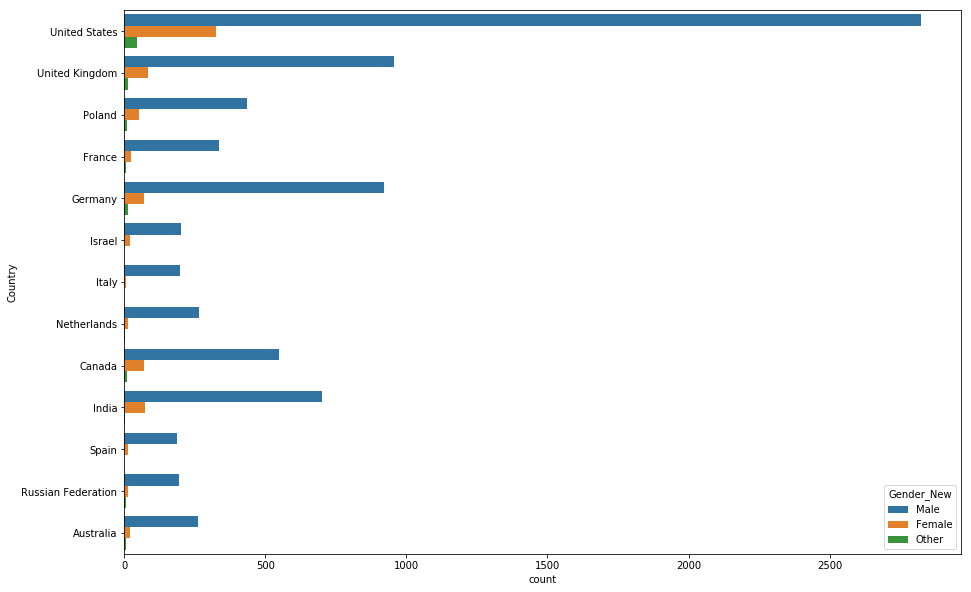

In [24]:
plt.figure(figsize=[15,10])
sns.countplot(y="Country", hue="Gender_New", data=df_plot)

The above plot did not show anything unexpected: United states with their biggest number of respondents has also the highest number of female developers. However, this plot does not allow us to see which country has the highest *ratio* of females out of the pool of respondents for that country. For that, I will be creating a pivot table and creating a Female Percentage column (F_Percentage)

In [25]:
#Create a pivot table
pivot = pd.pivot_table(df_plot, values='Respondent', index=['Country'],columns=['Gender_New'], aggfunc={'Respondent':len}, fill_value = 0)
df_pivot = pd.DataFrame(data = pivot)

In [26]:
df_pivot['Sum'] = df_pivot.apply(lambda row: row['Male'] + row['Female'] + row['Other'], axis=1)
df_pivot['F_Percentage'] = df_pivot.apply(lambda row: (row['Female']/row ['Sum'])*100, axis=1)
df_q1 = df_pivot.round({'F_Percentage': 1, 'Sum': 0})
df_final = df_q1.sort_values('F_Percentage', ascending=False)

In [27]:
df_final

Gender_New,Female,Male,Other,Sum,F_Percentage
Country,,,,,
Canada,69,547,11,627,11.0
Poland,53,435,11,499,10.6
United States,326,2825,45,3196,10.2
India,72,702,4,778,9.3
Israel,21,203,1,225,9.3
United Kingdom,85,956,12,1053,8.1
Australia,20,263,6,289,6.9
Germany,69,920,14,1003,6.9
France,24,337,7,368,6.5


In [28]:
df_final.to_csv('gender_countries.csv')

It can be seen from the table above that Canada has 11% of the respondents being Female, with Poland and United States coming in close 2 and 3 with 10.6% and 10.2 % respectively.

I am pleasantly surprised with Poland's and India's position in this list, because I expected United States and the UK to be at the top of the list. 

### Question 2: Does job satisfaction differ amongst genders?

To answer this question I will be examining:
    1. Column 'Gender_New' from df_gender
    2. 'JobSatisfaction' column from df_gender

In [29]:
df_gender.groupby(['Gender_New'])['Respondent'].count()

Gender_New
Female     1013
Male      11729
Other       168
Name: Respondent, dtype: int64

In [30]:
d = {'Gender_New': ['Female','Male', 'Other'], 'Num': [1013,11729,168], 'Percentage': [7.8,90.8,1.3]}
df_dis = pd.DataFrame(data=d)

In [31]:
df_dis

,Gender_New,Num,Percentage
0,Female,1013,7.8
1,Male,11729,90.8
2,Other,168,1.3


Text(0.5,1,'The distibution of respondents by Genders')

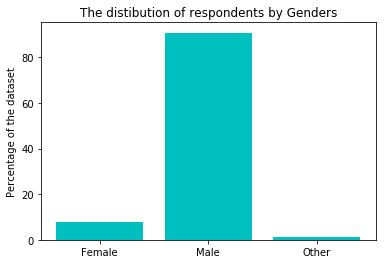

In [32]:
pyplot.bar(df_dis['Gender_New'], df_dis['Percentage'], color = 'c')
pyplot.ylabel('Percentage of the dataset')
pyplot.title('The distibution of respondents by Genders')

Seeing as 'Other' gender category makes up such a small amount of respondents(1.3% of those who answered to the Gender question), it would not be statistically relevant to include them in the analysis. Hence, rows with 'Other' category in 'Gender_New' column will be dropped.


In [33]:
#Dropping rows where Gender_new is 'other'
df_gen = df_gender[df_gender.Gender_New != 'Other']

In [34]:
#Checking that number of rows is as expected (12910 - 168)
df_gen.shape[0]

12742

I want to check how many missing values there are in the 'Jobsatisfaction' column, and if makes up a space propotion of the dataset, delete them from the dataset


In [35]:
df_gen['JobSatisfaction'].isnull().sum()

1972

In [36]:
#Dropping the missng values
df_gen_js = df_gen.dropna(subset=['JobSatisfaction'])

In [37]:
#Checking that the right amount of rows got removed (12742-1972)
df_gen_js.shape[0]

10770

In [38]:
#Examining the JobSatisfaction column values:
df_gen_js.JobSatisfaction.unique()

array([  9.,   3.,   6.,   7.,   8.,   5.,   4.,  10.,   2.,   0.,   1.])

In [39]:
df_gen_js.groupby(['JobSatisfaction'])['Respondent'].count()

JobSatisfaction
0.0       88
1.0       85
2.0      211
3.0      410
4.0      448
5.0      907
6.0     1196
7.0     2224
8.0     2570
9.0     1610
10.0    1021
Name: Respondent, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f410a567400>]], dtype=object)

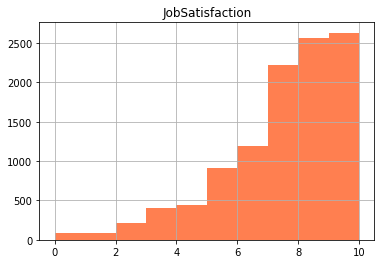

In [40]:
df_gen_js.hist(column='JobSatisfaction', color = 'coral')

We can see that there are more respondents that have chosen higher values of JobSatisfaction. Let's examine if there are any significant differences when split by Male and Female genders


In [41]:
#Let's confirm the number of respondents in the two groups
df_gen_js.groupby(['Gender_New'])['Respondent'].count()

Gender_New
Female     821
Male      9949
Name: Respondent, dtype: int64

I am going to perform a Two-sample Kolmogorov–Smirnov test on the Male and Female populations and see if their Job Satisfaction is of the same distibution. This test performs well on inbalanced sample sizes so will be appropriate here:

In [42]:
df_male_js = df_gen_js[df_gen_js['Gender_New']=='Male']
df_female_js = df_gen_js[df_gen_js['Gender_New']=='Female']

In [43]:
df_m_js = df_male_js['JobSatisfaction']
df_f_js = df_female_js['JobSatisfaction']

Null Hypothesis: The average Job Satisfcation difference between Males and Females is equal to zero.

Alternative Hypothesis: There is a difference in Job Satisfcation between the two groups

In [44]:
stats.ks_2samp(df_m_js,df_f_js)

Ks_2sampResult(statistic=0.015835327772125041, pvalue=0.99076455668030028)

Seeing as the p-value so big, we can conclude that the distribution of the two groups is almost identical, and hence the Null hypothesis cannot be rejected. I would liek to also visualize the resutls:

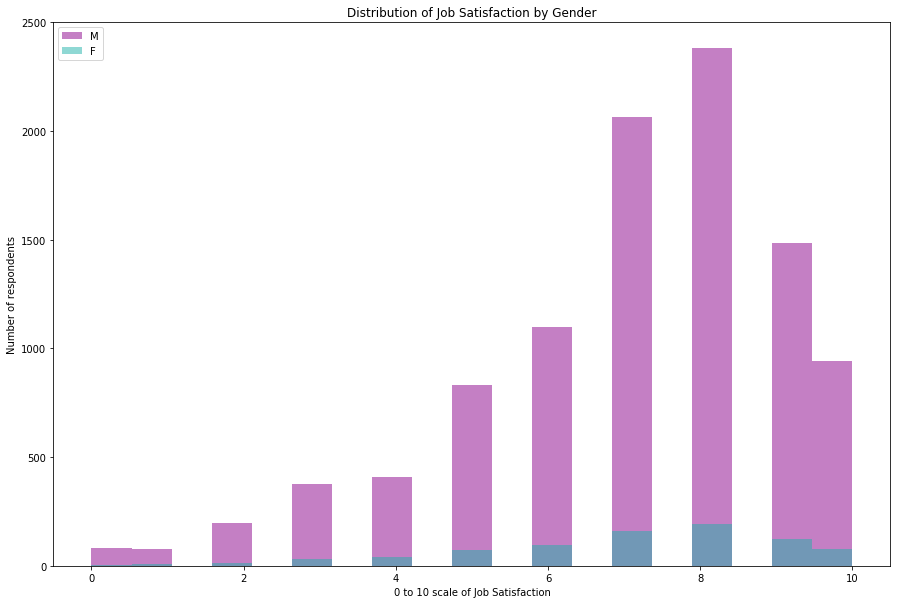

In [45]:
bins = np.linspace(0, 10, 20)

plt.figure(figsize=[15,10])
pyplot.hist(df_m_js, bins, alpha=0.5, label='M', color = 'darkmagenta')
pyplot.hist(df_f_js, bins, alpha=0.5, label='F',color = 'lightseagreen')
pyplot.legend(loc='upper left')
pyplot.title('Distribution of Job Satisfaction by Gender')
pyplot.xlabel('0 to 10 scale of Job Satisfaction')
pyplot.ylabel('Number of respondents')
pyplot.show()

We can conclude that Job Satisfaction does not differ between Male and Female groups. 

### Question 3: What are the features most correlated with predicting the respondent's gender?

I will be taking the dataset where the gender column has been split into Male, Female and the rows with values 'Other' have been dropped. This is due to the fact that I would like to use classifiers which require a binary target output. 

The following columns will be used in the analysis:
1. 'CareerSatisfaction'
2. 'FormalEducation', 
3. 'MajorUndergrad',
4. 'HomeRemote',
5. 'EmploymentStatus',
6. 'CompanyType',
7. 'YearsProgram',
8. 'YearsCodedJob',
9. 'UnderstandComputers',
10. 'HoursPerWeek'

The columns have been considered but will nto be included:
    1. Professional - only one value of 'Professional developer' present
    2. University - dispropotionaly the answer is No, and I would expect that current students will have much lower salary
    3. Salary - too many rows had missing values


###### Data Preprocessing

In [46]:
df_sal = df_gen[[
'Gender_New',
'FormalEducation', 
'MajorUndergrad',
'HomeRemote',
'EmploymentStatus',
'CompanyType',
'YearsProgram',
'YearsCodedJob',
'UnderstandComputers',
'HoursPerWeek',
'CareerSatisfaction']]

In [47]:
# Converting FormalEducation to numerical
df_sal = df_sal.replace({'Gender_New': {"Male": 1, 
                                        "Female": 0}})

In [48]:
# Converting YearsProgram to numerical
df_sal = df_sal.replace({'YearsProgram': {'Less than a year':1,
                                          '1 to 2 years': 1,
                                          '2 to 3 years': 1,
                                          '3 to 4 years': 1,
                                          '4 to 5 years': 1,
                                          '5 to 6 years': 2,
                                          '6 to 7 years': 2,
                                          '7 to 8 years': 2,
                                          '8 to 9 years': 2,
                                          '9 to 10 years': 2,
                                          '10 to 11 years': 3,
                                          '11 to 12 years': 3,
                                          '12 to 13 years': 3,
                                          '13 to 14 years': 3,
                                          '14 to 15 years': 3,
                                          '15 to 16 years': 4,
                                          '16 to 17 years': 4,
                                          '17 to 18 years': 4,
                                          '18 to 19 years': 4,
                                          '19 to 20 years': 4,
                                          '20 or more years': 5}})

In [49]:
#One hot encoding the YearsProgram column
df_sal.loc[df_sal['YearsProgram'] == 1, 'YearsProgram0_5'] = 1
df_sal.loc[df_sal['YearsProgram'] == 2, 'YearsProgram5_10'] = 1
df_sal.loc[df_sal['YearsProgram'] == 3, 'YearsProgram10_15'] = 1
df_sal.loc[df_sal['YearsProgram'] == 4, 'YearsProgram15_20'] = 1
df_sal.loc[df_sal['YearsProgram'] == 5, 'YearsProgram20+'] = 1

In [50]:
df_sal['YearsProgram0_5'].fillna(0, inplace=True)
df_sal['YearsProgram5_10'].fillna(0, inplace=True)
df_sal['YearsProgram10_15'].fillna(0, inplace=True)
df_sal['YearsProgram15_20'].fillna(0, inplace=True)
df_sal['YearsProgram20+'].fillna(0, inplace=True)

In [51]:
# Converting YearsCodedJob to numerical
df_sal = df_sal.replace({'YearsCodedJob': {'Less than a year':1,
                                          '1 to 2 years': 1,
                                          '2 to 3 years': 1,
                                          '3 to 4 years': 1,
                                          '4 to 5 years': 1,
                                          '5 to 6 years': 2,
                                          '6 to 7 years': 2,
                                          '7 to 8 years': 2,
                                          '8 to 9 years': 2,
                                          '9 to 10 years': 2,
                                          '10 to 11 years': 3,
                                          '11 to 12 years': 3,
                                          '12 to 13 years': 3,
                                          '13 to 14 years': 3,
                                          '14 to 15 years': 3,
                                          '15 to 16 years': 4,
                                          '16 to 17 years': 4,
                                          '17 to 18 years': 4,
                                          '18 to 19 years': 4,
                                          '19 to 20 years': 4,
                                          '20 or more years': 5}})

In [52]:
#One hot encoding the YearsCodedJob column
df_sal.loc[df_sal['YearsCodedJob'] == 1, 'YearsCodedJob0_5'] = 1
df_sal.loc[df_sal['YearsCodedJob'] == 2, 'YearsCodedJob5_10'] = 1
df_sal.loc[df_sal['YearsCodedJob'] == 3, 'YearsCodedJob10_15'] = 1
df_sal.loc[df_sal['YearsCodedJob'] == 4, 'YearsCodedJob15_20'] = 1
df_sal.loc[df_sal['YearsCodedJob'] == 5, 'YearsCodedJob20+'] = 1

In [53]:
df_sal['YearsCodedJob0_5'].fillna(0, inplace=True)
df_sal['YearsCodedJob5_10'].fillna(0, inplace=True)
df_sal['YearsCodedJob10_15'].fillna(0, inplace=True)
df_sal['YearsCodedJob15_20'].fillna(0, inplace=True)
df_sal['YearsCodedJob20+'].fillna(0, inplace=True)

In [54]:
#Dropping the original columns
df_sal = df_sal.drop(['YearsProgram', 'YearsCodedJob'], axis=1)

In [55]:
# Fill NaN with mode for each column
df_sal = df_sal.fillna(df_sal.mode())

In [56]:
df_sal = df_sal.dropna()

In [57]:
#Checking that there are no NaN values
df_sal.isnull().sum()

Gender_New             0
FormalEducation        0
MajorUndergrad         0
HomeRemote             0
EmploymentStatus       0
CompanyType            0
UnderstandComputers    0
HoursPerWeek           0
CareerSatisfaction     0
YearsProgram0_5        0
YearsProgram5_10       0
YearsProgram10_15      0
YearsProgram15_20      0
YearsProgram20+        0
YearsCodedJob0_5       0
YearsCodedJob5_10      0
YearsCodedJob10_15     0
YearsCodedJob15_20     0
YearsCodedJob20+       0
dtype: int64

In [58]:
# Split the data into features and target label
features_raw = df_sal.drop('Gender_New', axis = 1)
target = df_sal['Gender_New']

In [59]:
features_final = pd.get_dummies(features_raw)

In [60]:
# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [61]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2428 samples.
Testing set has 608 samples.


In [62]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    learner = learner.fit(X_train, y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test)
       
        
    # Return the results
    return results

In [69]:
dt_model = tree.DecisionTreeClassifier(random_state=27)
train_predict(dt_model, X_train, y_train, X_test, y_test)

{'acc_train': 1.0,
 'acc_test': 0.82565789473684215,
 'f_train': 1.0,
 'f_test': 0.90381125226860259}

In [70]:
lg_model = LogisticRegression(random_state=27)
train_predict(lg_model, X_train, y_train, X_test, y_test)

{'acc_train': 0.92666666666666664,
 'acc_test': 0.91611842105263153,
 'f_train': 0.96193771626297575,
 'f_test': 0.95622317596566531}

In [71]:
ab_model = AdaBoostClassifier(random_state=27)
train_predict(ab_model, X_train, y_train, X_test, y_test)

{'acc_train': 0.92333333333333334,
 'acc_test': 0.91447368421052633,
 'f_train': 0.96013864818024275,
 'f_test': 0.95524956970740094}

##### Visualize

In [72]:
coefficients = pd.concat([pd.DataFrame({'Feature': features_final.columns}),
                          pd.DataFrame(np.transpose(lg_model.coef_))], axis = 1)

In [73]:
coefficients.rename(columns={0:'Coeficient'}, inplace=True)

In [74]:
coefficients.sort_values(by=['Coeficient'], ascending=False)

,Feature,Coeficient
17,FormalEducation_Some college/university study ...,1.128779
25,MajorUndergrad_Computer programming or Web dev...,1.105660
22,MajorUndergrad_A non-computer-focused engineer...,0.973266
42,EmploymentStatus_Employed part-time,0.894049
6,YearsProgram20+,0.746918
59,UnderstandComputers_Strongly disagree,0.681295
53,CompanyType_State-owned company,0.676894
38,"HomeRemote_Less than half the time, but at lea...",0.593341
10,YearsCodedJob15_20,0.588030
40,HomeRemote_Never,0.514711


###### Model Selecion:

- We can see that Decision tree over-fits on the training dataset, with 100% accuracy and F1 score on the training datasets
- Logistic regression slightly outperforms Ada Boost on both training and test datasets. Hence, the logistic regression was chosen to produce coeficients


Years porgramming and tears coded in a job seem to be interesting variables. I want to visualize the coeffients for their respective year brackets.

In [107]:
df_yp = coefficients.loc[coefficients['Feature'].isin(['YearsProgram0_5','YearsProgram5_10','YearsProgram10_15','YearsProgram15_20', 'YearsProgram20+'])]
sorted_yp = df_yp.sort_values(by=['Coeficient'], ascending=True)
sorted_yp

,Feature,Coeficient
2,YearsProgram0_5,-0.722797
3,YearsProgram5_10,-0.168703
4,YearsProgram10_15,0.308233
5,YearsProgram15_20,0.512253
6,YearsProgram20+,0.746918


Text(0,0.5,'Coefficient value')

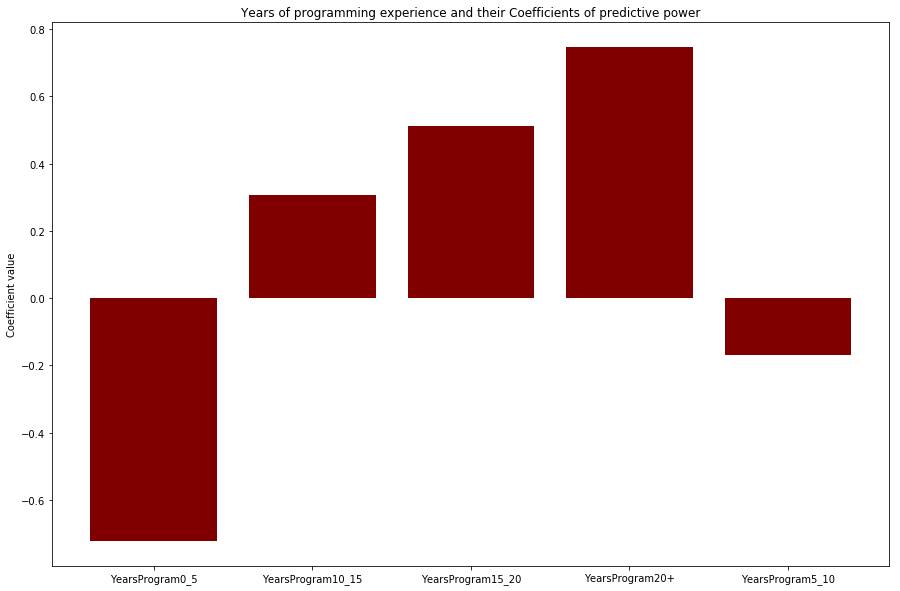

In [110]:
plt.figure(figsize=[15,10])
pyplot.bar(sorted_yp['Feature'], sorted_yp['Coeficient'], color = 'maroon')
plt.title('Years of programming experience and their Coefficients of predictive power')
plt.ylabel('Coefficient value')


In [76]:
df_ycj = coefficients.loc[coefficients['Feature'].isin(['YearsCodedJob0_5','YearsCodedJob5_10','YearsCodedJob10_15','YearsCodedJob15_20', 'YearsCodedJob20+'])]
sorted_ycj = df_ycj.sort_values(by=['Coeficient'], ascending=True)
sorted_ycj

,Feature,Coeficient
11,YearsCodedJob20+,-0.574636
8,YearsCodedJob5_10,-0.434452
7,YearsCodedJob0_5,-0.326330
9,YearsCodedJob10_15,0.385472
10,YearsCodedJob15_20,0.588030


Text(0,0.5,'Coefficient value')

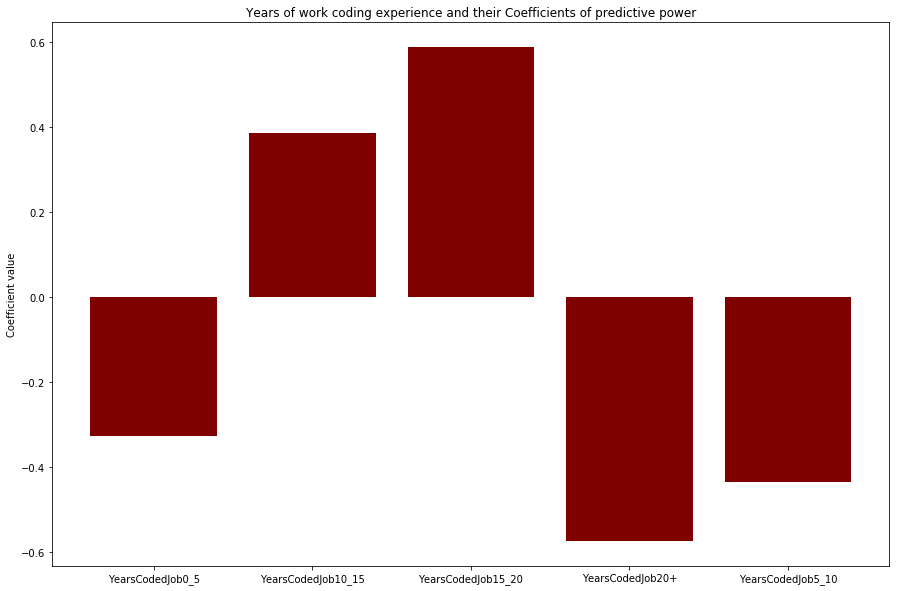

In [77]:
plt.figure(figsize=[15,10])
pyplot.bar(sorted_ycj['Feature'], sorted_ycj['Coeficient'], color = 'maroon')
plt.title('Years of work coding experience and their Coefficients of predictive power')
plt.ylabel('Coefficient value')

It is fascinating to see how explicitly the years of programmign experience correlate with male gender with the coefficients increading incrementally. However, it is puzzling why 'more than 20 years coding in a job' is less correlated than '0-5 years of coding in a job'.I am not sure why that is.

###### Question 3: Conclusion

The following variables most correlate with male gender of the developer:
    - Computer programming/ non-computer engineering undergraduate studies
    - A university degree
    - Working part time
    - Over 20 years of programming experience

The following variables least correlate with male gender of the developer:
    - Social/Natural sciences and business discipline undergraduate studies
    - Zero to five years of programmign experience
    - Over 20 years of coding experience in a job